# Validation through shuffled heterogeneous gradients

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# First Import the runs:

Best = glob.glob("D:\Simulations\LCHetVal\*Best*.csv")

In [3]:
Score = []
G = []
Sigma = []

for item in Best:
    a = np.genfromtxt(item)
    Score.append(a[0])
    G.append(a[1])
    Sigma.append(a[2])

In [37]:
df = pd.DataFrame({"Score":Score,"G":G,"Sigma":Sigma})
df = df.sort_values(by="Score")

df

,Score,G,Sigma
0,0.577075,0.85,0.0
167,0.577075,0.85,0.0
168,0.577075,0.85,0.0
169,0.577075,0.85,0.0
172,0.577075,0.85,0.0
...,...,...,...
249,0.655160,0.40,0.6
165,0.657422,0.60,0.6
28,0.660042,0.75,0.2
212,0.664181,0.70,0.4


In [50]:
# Select Rows whose column values equals a scalar 
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

Sigma_0 = df.loc[df['Sigma'] == 0.0]["Score"]
Sigma_02 = df.loc[df['Sigma'] == 0.2]["Score"]
Sigma_04 = df.loc[df['Sigma'] == 0.4]["Score"]
Sigma_06 = df.loc[df['Sigma'] == np.arange(start=0,stop=1,step=0.2)[4]]["Score"]
Sigma_08 = df.loc[df['Sigma'] == 0.8]["Score"]
Sigma_1 = df.loc[df['Sigma'] == 1.0]["Score"]

Text(0.5, 0, 'Sigma')

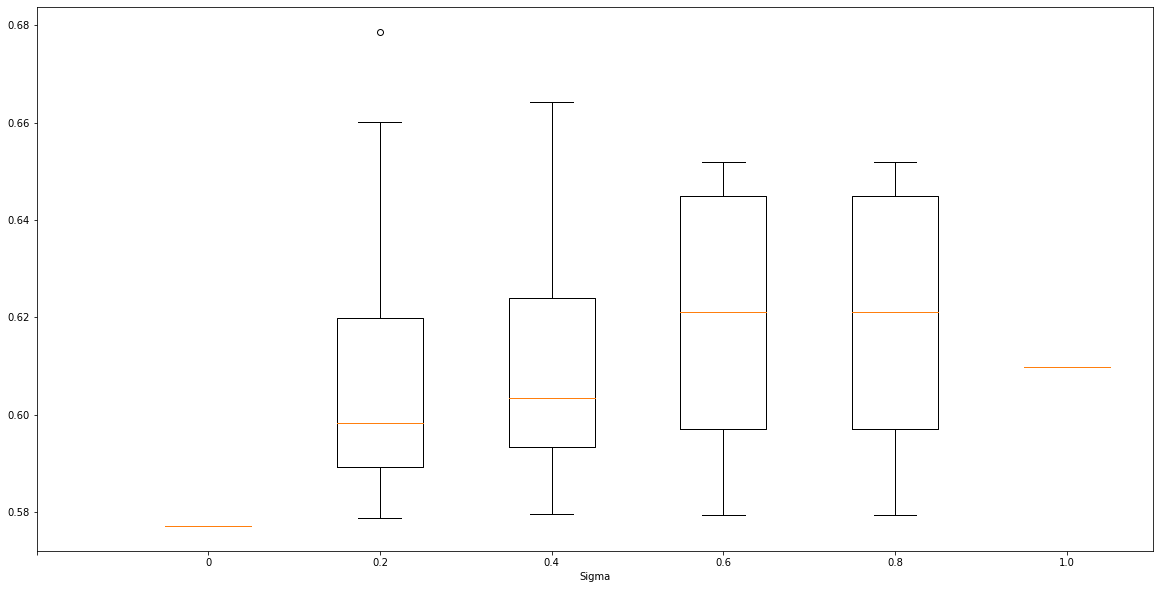

In [65]:
plt.boxplot([Sigma_0,Sigma_02,Sigma_04,Sigma_06,Sigma_08,Sigma_1])
plt.xticks([0, 1, 2, 3, 4,5,6],["","0", "0.2", "0.4", "0.6", "0.8","1.0"])
plt.xlabel("Sigma")

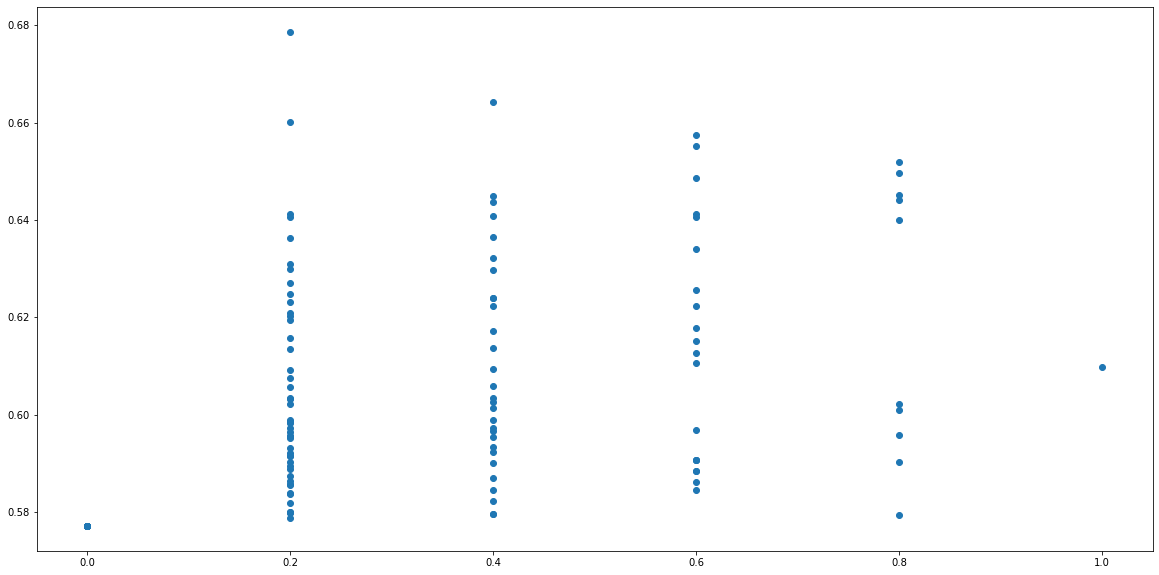

In [4]:
plt.scatter(Sigma,Score)

(array([193.,   0.,  47.,   0.,  29.,   0.,  20.,   0.,  10.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

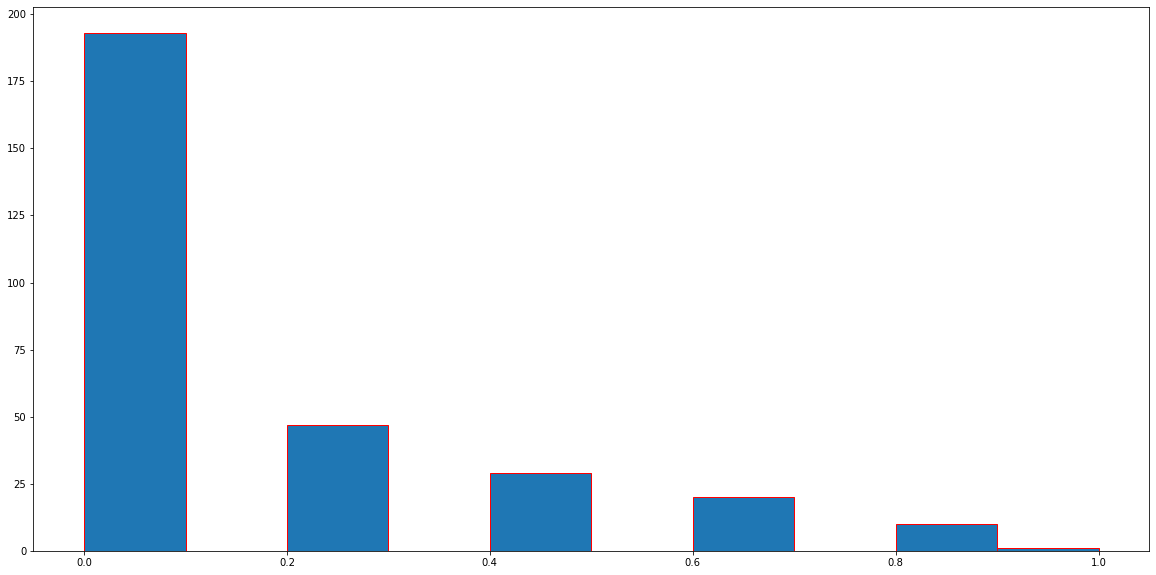

In [22]:
plt.hist(Sigma,edgecolor='red')

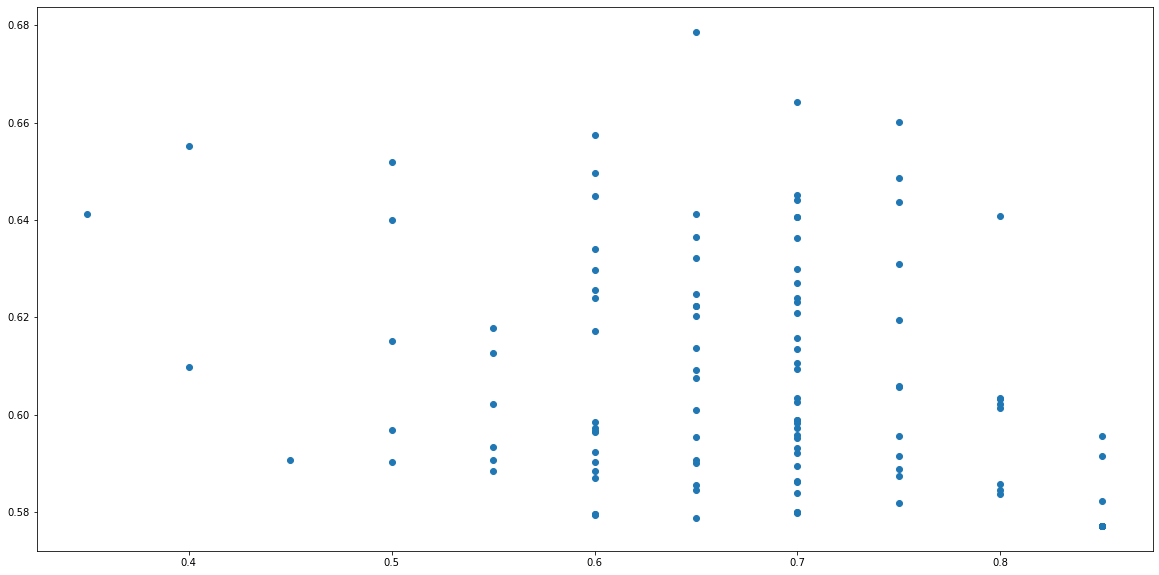

In [21]:
plt.scatter(G,Score)

(array([211.,  27.,  14.,  11.,  12.,   7.,  10.,   5.,   2.,   1.]),
 array([0.57707507, 0.58723038, 0.59738568, 0.60754099, 0.6176963 ,
        0.62785161, 0.63800692, 0.64816223, 0.65831753, 0.66847284,
        0.67862815]),
 <BarContainer object of 10 artists>)

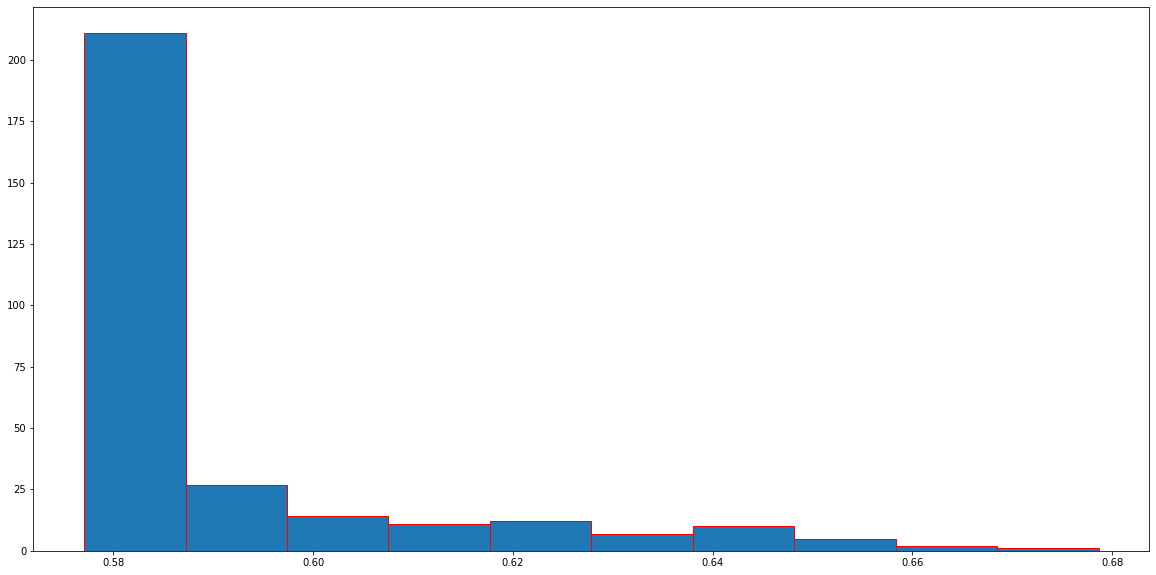

In [14]:
plt.hist(Score,edgecolor='red')

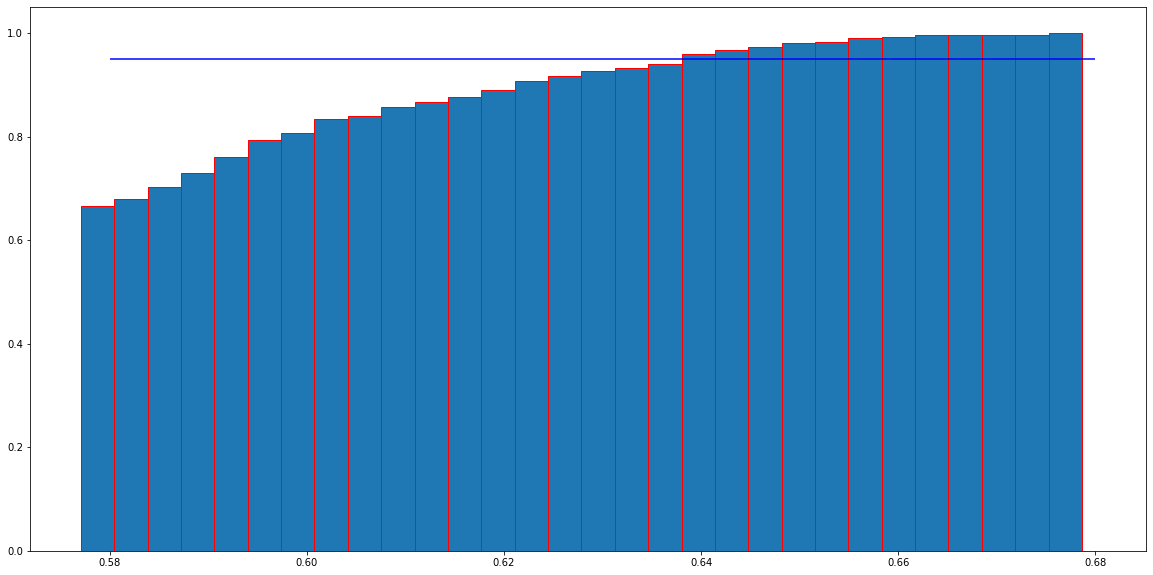

In [20]:
plt.hist(Score,cumulative=True,density=True,edgecolor='red',bins=30)
plt.hlines(y=0.95,xmin=0.58,xmax=0.68,color='b')
#plt.grid()